##Importing the model

In [1]:
import timm

model = timm.create_model('resnet18', pretrained=True)
model.eval();

##Resizing and showing the images after resizing 

(416, 416, 3)
(416, 416, 3)
(416, 416, 3)
(416, 416, 3)


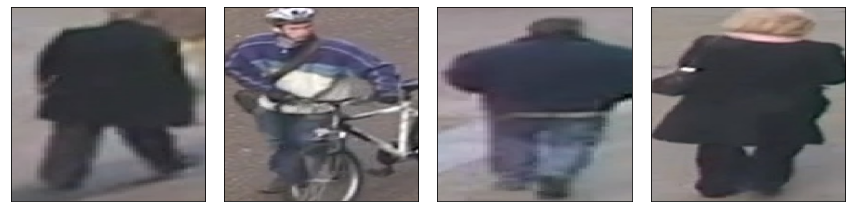

In [4]:
import cv2
from render import show_images

imgs = []

for file_path in ['0.jpg', '1.jpg', '2.jpg', '3.jpg']:
    img = cv2.imread(file_path)[..., ::-1]
    img = cv2.resize(img, (416, 416),
               interpolation = cv2.INTER_NEAREST)
    print(img.shape)
    imgs.append(img)

show_images(imgs, per_row=4, imsize=(3, 3));

In [5]:
print(len(imgs))

4


In [6]:
import torch
from prepare_input import prepare

inps = [prepare(img, model.default_cfg['mean'], model.default_cfg['std'])
        for img in imgs]

with torch.no_grad():
    out = torch.softmax(model(inps[0]), -1)[0].numpy()

print(out.argmax())

556


##Finding the different layer in pretrained module

In [7]:
from torchvision.models.feature_extraction import get_graph_node_names
from pprint import pprint

train_nodes, eval_nodes = get_graph_node_names(model)

assert([t == e for t, e in zip(train_nodes, eval_nodes)])

pprint(train_nodes)

['x',
 'conv1',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.add',
 'layer1.0.act2',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.add',
 'layer1.1.act2',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.act2',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.act1',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.add',
 'layer2.1.act2',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.act1',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.0.add',
 'layer3.0.act2',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.act1',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer3.1.add',
 'layer3.1.act2',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.act1',
 'layer4.0.conv2',
 'layer4.0.bn2',
 'layer4.0.

Extracting Features from different layer and showing visualing the features in different layers with an example of image

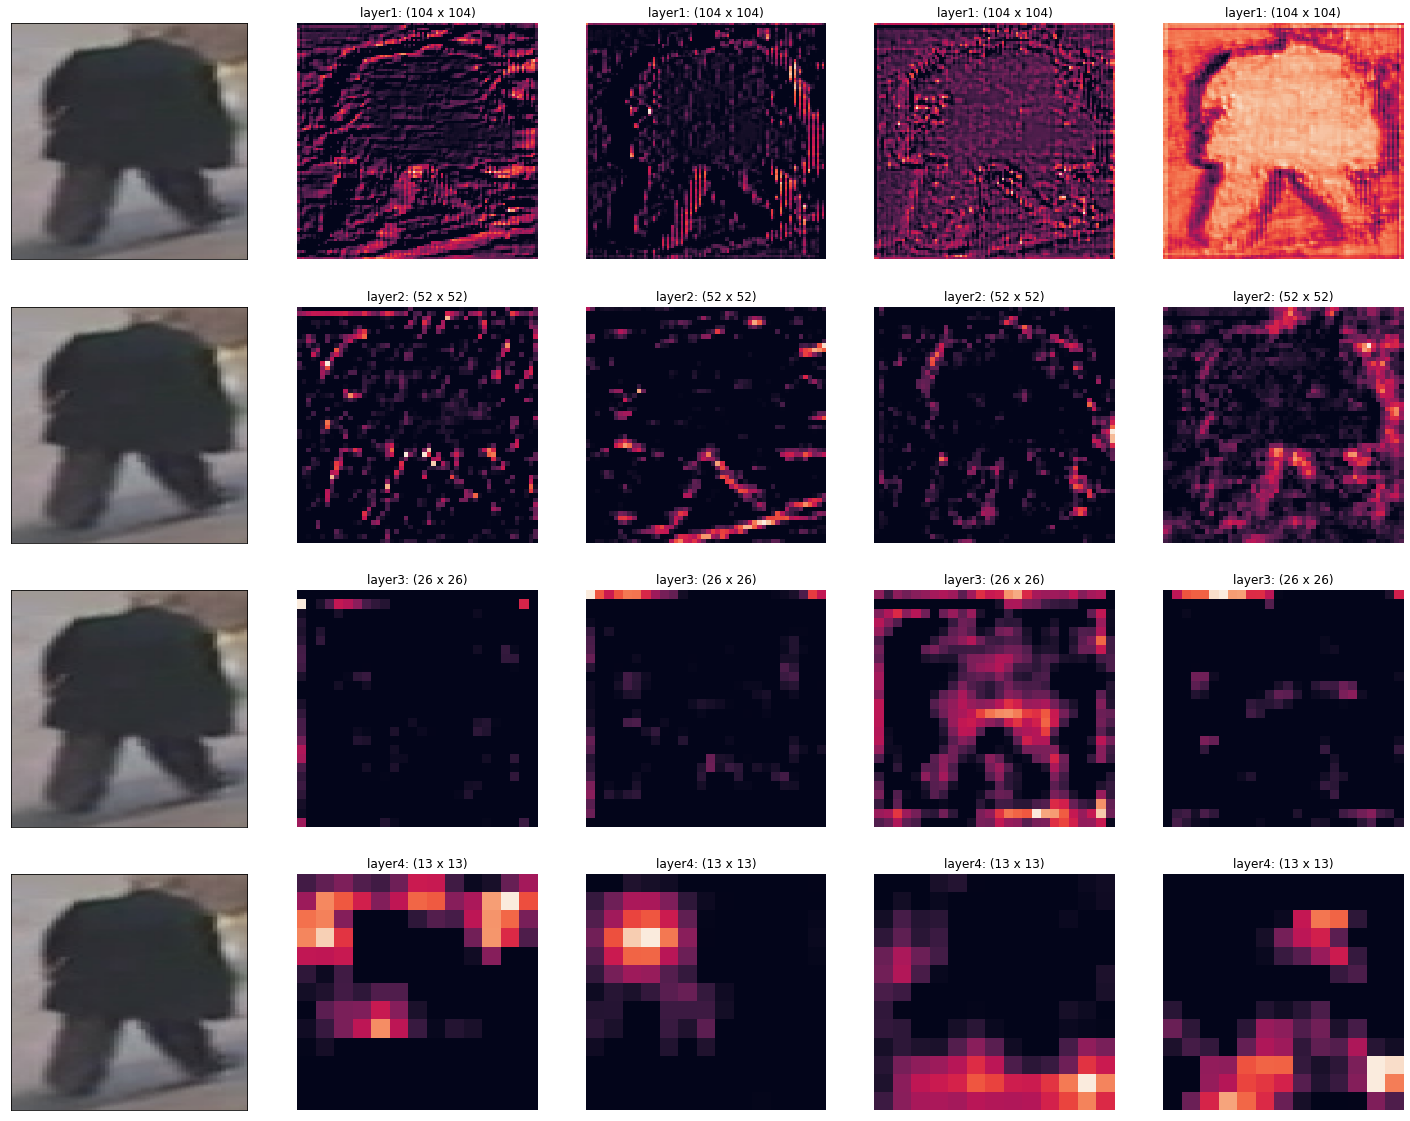

In [10]:
from torchvision.models.feature_extraction import create_feature_extractor
import random
import seaborn as sns
import matplotlib.pyplot as plt

return_nodes = ['layer1', 'layer2', 'layer3', 'layer4']

feat_ext = create_feature_extractor(model, return_nodes=return_nodes)

with torch.no_grad():
    out = feat_ext(inps[0])

fig, ax = plt.subplots(4, 5, figsize=(25, 20))

# Pick 4 random feature maps from each layer
for i, layer in enumerate(return_nodes):
    feat_maps = out[layer].numpy().squeeze(0)
    feat_maps = random.sample(list(feat_maps), 4)
    ax[i][0].imshow(imgs[0])
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    for j, feat_map in enumerate(feat_maps):
        sns.heatmap(feat_map, ax=ax[i][j+1], cbar=False)
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        ax[i][j+1].set_title(f'{layer}: ({feat_map.shape[0]} x {feat_map.shape[1]})')

In [11]:
out['layer1'].shape


torch.Size([1, 64, 104, 104])

In [12]:
out['layer2'].shape

torch.Size([1, 128, 52, 52])

In [13]:
out['layer3'].shape

torch.Size([1, 256, 26, 26])

In [14]:
out['layer4'].shape

torch.Size([1, 512, 13, 13])

##Using the adaptive Avarage Pooling

In [15]:
import torch.nn as nn
m = nn.AdaptiveAvgPool2d((1,1))
n = nn.AdaptiveAvgPool2d((1,1))
o = nn.AdaptiveAvgPool2d((1,1))
p = nn.AdaptiveAvgPool2d((1,1))



In [16]:
layer1_out = m(out['layer1']).view(1,-1)
layer2_out = n(out['layer2']).view(1,-1)
layer3_out = m(out['layer3']).view(1,-1)
layer4_out = m(out['layer4']).view(1,-1)

##Printing the size of each layer output

In [17]:
print(layer1_out.size())
print(layer2_out.size())
print(layer3_out.size())
print(layer4_out.size())

torch.Size([1, 64])
torch.Size([1, 128])
torch.Size([1, 256])
torch.Size([1, 512])


In [18]:
print(layer1_out)

tensor([[0.4272, 0.4475, 0.1635, 0.2760, 0.9932, 0.1139, 0.2437, 0.1523, 1.1144,
         0.0513, 0.6254, 0.8035, 0.2689, 0.1188, 0.2403, 0.0756, 0.4570, 0.4139,
         0.1080, 0.2570, 0.1644, 0.6998, 0.4545, 0.0883, 0.0724, 0.6771, 0.3479,
         0.3946, 0.3025, 0.2688, 0.6980, 0.3435, 0.1379, 0.0588, 0.4520, 0.0326,
         0.5712, 0.4570, 0.6454, 0.8228, 0.3873, 0.7386, 0.7859, 0.6885, 0.3583,
         0.5494, 0.9317, 0.7959, 0.3298, 0.6385, 1.1674, 0.5357, 0.1561, 0.1999,
         0.2583, 0.3545, 0.1094, 0.3023, 0.5167, 0.7052, 0.4244, 0.7898, 0.0604,
         0.9124]])


In [2]:
import torch
torch.ops.load_library("op.pyd")
torch.ops.custom_namespace.op

<OpOverloadPacket(op='custom_namespace.op')>

In [22]:
import os

import cv2

current_path = os.getcwd()

folder = os.path.join(current_path, 'Challenge_images')
imgs = []

    # loop us implemented to read the images one by one from the loop.
    # listdir return a list containing the names of the entries
    # in the directory.
for filename in os.listdir(folder):
    img = cv2.imread((os.path.join(folder, filename)))
    img = cv2.resize(img, (416, 416),
               interpolation = cv2.INTER_NEAREST)
    imgs.append(img)

        # seperate the file as well as extenstion using the below code
    file, extention = os.path.splitext(os.path.join(folder, filename))

## Final Script to Find out uniqueness of image in all the image file in Challenge_images folder

In [4]:
import timm
import cv2
import os
import torch
from torchvision.models.feature_extraction import create_feature_extractor
import random
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
torch.ops.load_library("op.pyd")     #instead of reduction the operator name is used as op

from prepare_input import prepare

from render import show_images

model = timm.create_model('resnet18', pretrained=True)
model.eval();

current_path = os.getcwd()

folder = os.path.join(current_path, 'Challenge_images')
imgs = []

    # loop us implemented to read the images one by one from the loop.
    # listdir return a list containing the names of the entries
    # in the directory.
for filename in os.listdir(folder):
    img = cv2.imread((os.path.join(folder, filename)))
    img = cv2.resize(img, (416, 416),
               interpolation = cv2.INTER_NEAREST)
    imgs.append(img)

inps = [prepare(img, model.default_cfg['mean'], model.default_cfg['std'])
        for img in imgs]

return_nodes = ['layer1', 'layer2', 'layer3', 'layer4']

feat_ext = create_feature_extractor(model, return_nodes=return_nodes)
tensor_result =torch.zeros(50,512)
for i in range(0,50):
    with torch.no_grad():
        out = feat_ext(inps[i])
    
    m = nn.AdaptiveAvgPool2d((1,1))
    n = nn.AdaptiveAvgPool2d((1,1))
    o = nn.AdaptiveAvgPool2d((1,1))
    p = nn.AdaptiveAvgPool2d((1,1))

    layer1_out = m(out['layer1']).view(1,-1)
    layer2_out = n(out['layer2']).view(1,-1)
    layer3_out = m(out['layer3']).view(1,-1)
    layer4_out = m(out['layer4']).view(1,-1)

    x = torch.ops.custom_namespace.op(layer1_out,layer2_out,layer3_out,layer4_out)
    tensor_result[i] = x

image_list = []
for i in range(0,50):
    count = 0
    for j in range(0,50):
        cos = torch.nn.CosineSimilarity(dim=0)
        output = cos(tensor_result[i],tensor_result[j])
        #print(output)
        if(output>=0.75):
            count = count + 1
        else:
            pass   
    if count <= 1:
        image_list.append(i)
    
print("Unique images are:")
for x in image_list:
   print(x)







Unique images are:
3
8
22
31
37
41
